In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import os

# _FOLDER = "/home/ac1jjgg/MOGP_GPyTorch/FiveCancersDataSet/"
_FOLDER = "/home/juanjo/Work_Postdoc/my_codes_postdoc/GPyTorch_Models/FiveCancersDataSet/"
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Train_names = ['Breast_train_GMLcLa_updated.csv', 'Glioma_train_BMLcLa_updated.csv',
               'LungAdenocarcinoma_train_BGMLc_updated.csv', 'LungCarcinoma_train_BGMLa_updated.csv',
               'Melanoma_train_BGLcLa_updated.csv']
Test_names = ['Breast_test_updated.csv', 'Glioma_test_updated.csv', 'Lung_adenocarcinoma_test_updated.csv',
              'Lung_carcinoma_test_updated.csv', 'Melanoma_test_updated.csv']

name_for_KLrelevance = 'Melanoma_BRAF_Targeted_Drugs.csv'

How_Many_Nfold = 1
for Nfold in range(0, How_Many_Nfold):
    print(f"Train Name in Nfold {Nfold}:", Train_names[Nfold])
    print(f"Test Name in Nfold {Nfold}:", Test_names[Nfold])
    df_train_No_MolecForm = pd.read_csv(
        _FOLDER + "Train/" + Train_names[Nfold])  # Contain Train dataset prepared by Subhashini-Evelyn
    df_test_No_MolecForm = pd.read_csv(
        _FOLDER + "/Test/" + Test_names[Nfold])  # Contain Test dataset prepared by Subhashini-Evelyn

    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    # we realised that the column "molecular_formula" is a string like
    # The updated files by subhashini do not have 'molecular_formula' anymore
    # df_train_No_MolecForm = df_train.drop(columns='molecular_formula')
    # df_test_No_MolecForm = df_test.drop(columns='molecular_formula')
    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    try:
        df_train_No_MolecForm = df_train_No_MolecForm.drop(columns='Drug_Name')
    except:
        pass

    try:
        df_test_No_MolecForm = df_test_No_MolecForm.drop(columns='Drug_Name')
    except:
        pass

    print((df_train_No_MolecForm.columns == df_test_No_MolecForm.columns).sum())
    # Here we just check that from the column index 28 the input features start
    print(df_train_No_MolecForm.columns[28])

Train Name in Nfold 0: Breast_train_GMLcLa_updated.csv
Test Name in Nfold 0: Breast_test_updated.csv
854
ABCB1_mut


(68, 826)


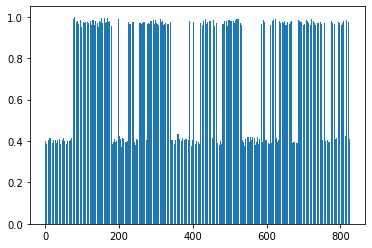

In [10]:
df_melanoma = pd.read_csv(_FOLDER+name_for_KLrelevance)
#df_KLRelevance_Mtx = pd.read_csv(_FOLDER+'Relevance_KL_HPC_Melanoma.txt', names=["col"+str(i) for i in range(df_train_No_MolecForm.shape[0]+1)])
df_KLRelevance_Mtx = pd.read_csv(_FOLDER+'Relevance_KL_HPC_Melanoma.txt', names=["col"+str(i) for i in range(df_melanoma.shape[0]+1)])
df_sorted = df_KLRelevance_Mtx.sort_values(by=['col0'])
KL_Relevance = df_sorted.values
KL_Relevance = KL_Relevance[:,1:].T  #We getrid of first index position
print(KL_Relevance.shape)
KL_p = np.mean(KL_Relevance,0)
plt.bar(np.arange(0,826),KL_p/KL_p.max())

df_KLR_With_Column_Names = pd.DataFrame(KL_p[None,:]/KL_p.max(), columns=df_train_No_MolecForm.columns[28:])
df_KL_Col_Names_Sorted = df_KLR_With_Column_Names.sort_values(by= 0,axis=1,ascending = False)

In [20]:
#df_KLRelevance_Mtx
#df_sorted
#df_sorted.values.shape
df_KLR_With_Column_Names

,ABCB1_mut,ACACA_mut,ACVR2A_mut,AFF4_mut,AHCTF1_mut,AHNAK_mut,AKAP9_mut,ALK_mut,ANK3_mut,APAF1_mut,...,MEK5,ERK5,RSK,Farnesyl-transferase (FNTA),EGFR,EGFR signaling,ERK MAPK signaling,Other,"Other, kinases",PI3K/MTOR signaling
0,0.398148,0.407105,0.396755,0.384224,0.411345,0.378836,0.392964,0.431224,0.405652,0.394255,...,0.972649,0.986029,0.961879,0.965536,0.980565,0.96726,0.975436,0.964498,0.96422,0.409144


In [11]:
#Top 30 most important features out of 826 features
df_KL_Col_Names_Sorted[df_KL_Col_Names_Sorted.columns[0:30]].min()

FBXW7_mut                                   1.000000
loss:cnaPANCAN79                            0.995673
loss:cnaPANCAN72                            0.995443
loss:cnaPANCAN114 (CIITA)                   0.993501
PLCG1_mut                                   0.992396
NCOR1_mut                                   0.992238
PCSK5_mut                                   0.991555
PTPRU_mut                                   0.991414
chr2:219646432-219647181(CYP27A1)_HypMET    0.991389
gain:cnaPANCAN87                            0.990771
loss:cnaPANCAN307 (CHD3,GPS2,TP53)          0.990594
KALRN_mut                                   0.990498
FAM123B_mut                                 0.990140
gain:cnaPANCAN123                           0.989350
loss:cnaPANCAN218                           0.989264
chr2:190539026-190539533(ANKAR)_HypMET      0.988940
loss:cnaPANCAN310 (MAP2K4)                  0.988814
chr8:144659745-144660635(NAPRT1)_HypMET     0.988689
loss:cnaPANCAN216                           0.

In [12]:
#Top 30 least important features out of 826 features
df_KL_Col_Names_Sorted[df_KL_Col_Names_Sorted.columns[-30:]].min()

loss:cnaPANCAN255                          0.383995
loss:cnaPANCAN200                          0.383798
BRAF_mut                                   0.383535
CTNNB1_mut                                 0.383209
N                                          0.383107
gain:cnaPANCAN383                          0.382747
loss:cnaPANCAN262 (FOXP1)                  0.382482
loss:cnaPANCAN358                          0.382321
loss:cnaPANCAN400                          0.382184
loss:cnaPANCAN257                          0.381992
loss:cnaPANCAN261                          0.381886
chr6:26188997-26189295(HIST1H4D)_HypMET    0.381750
BRWD1_mut                                  0.381345
loss:cnaPANCAN24                           0.381060
ZNF292_mut                                 0.381040
ASXL2_mut                                  0.381005
gain:cnaPANCAN176 (CCT5,TERT,TRIO)         0.380064
chr10:94351356-94351615(KIF11)_HypMET      0.379478
chr15:93198374-93199181(FAM174B)_HypMET    0.379443
AHNAK_mut   